In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import wordcloud

In [2]:
import nltk

In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords

In [4]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import string
import re

In [5]:
nltk.download("stopwords")
stemmer = nltk.SnowballStemmer("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
import pandas as pd

In [7]:
df = pd.read_csv("tiktok_google_play_reviews.csv")
df.head()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16504\1256147048.py:1: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("tiktok_google_play_reviews.csv")


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,68ccaec8-1415-4301-a85e-3004679a3a83,Cassie Moore,https://play-lh.googleusercontent.com/a/ALm5wu...,No words,5,0,27.1.3,2022-11-29 21:55:37,NaN,NaN
1,d84cbfd3-6aa3-485c-aaf9-c5dca27dc966,Kaleb Plummer,https://play-lh.googleusercontent.com/a-/ACNPE...,Great fun app so far!,5,0,NaN,2022-11-29 21:55:04,NaN,NaN
2,96618aa1-31e5-4259-8649-89b75d962f00,Rylee Maher,https://play-lh.googleusercontent.com/a/ALm5wu...,The app would get a higher rating but I litera...,1,0,27.1.3,2022-11-29 21:54:48,NaN,NaN
3,078c0bda-598b-474e-a04e-d7cb3e6f6301,Kittykatelyn Romilly,https://play-lh.googleusercontent.com/a-/ACNPE...,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,5,0,NaN,2022-11-29 21:54:35,NaN,NaN
4,8e68c5cd-b12a-4206-a8da-6bfdbff44ae3,Loveness Malenga,https://play-lh.googleusercontent.com/a-/ACNPE...,Pictures and record,5,0,NaN,2022-11-29 21:54:21,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460287 entries, 0 to 460286
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              460287 non-null  object
 1   userName              460287 non-null  object
 2   userImage             460287 non-null  object
 3   content               460256 non-null  object
 4   score                 460287 non-null  int64 
 5   thumbsUpCount         460287 non-null  int64 
 6   reviewCreatedVersion  333953 non-null  object
 7   at                    460287 non-null  object
 8   replyContent          260 non-null     object
 9   repliedAt             260 non-null     object
dtypes: int64(2), object(8)
memory usage: 35.1+ MB


In [9]:
# Data Preprocessing

# Only 2 columns required: "Content" "Score"

# Create new dataset containing only these two columns

df = df[["content", "score"]]
df.head()

,content,score
0,No words,5
1,Great fun app so far!,5
2,The app would get a higher rating but I litera...,1
3,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,5
4,Pictures and record,5


In [10]:
# Checking for "Null Values"
df.isnull().sum()

content    31
score       0
dtype: int64

In [11]:
# Drop null values
df = df.dropna()
df.head()

,content,score
0,No words,5
1,Great fun app so far!,5
2,The app would get a higher rating but I litera...,1
3,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,5
4,Pictures and record,5


In [12]:
df.isnull().sum()   # Recheck

content    0
score      0
dtype: int64

In [13]:
# Cleaning data

stopword = set(stopwords.words("english"))
def clean(text):
    text = str(text).lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
df["content"] = df["content"].apply(clean)

In [14]:
df.head()

,content,score
0,word,5
1,great fun app far,5
2,app would get higher rate liter cant sign seco...,1
3,wish could give percent rate love 💕 😘,5
4,pictur record,5


In [15]:
ratings = df["score"].value_counts()
numbers = ratings.index
quantity = ratings.values
df.head()

,content,score
0,word,5
1,great fun app far,5
2,app would get higher rate liter cant sign seco...,1
3,wish could give percent rate love 💕 😘,5
4,pictur record,5


In [16]:
import plotly.express as px

In [17]:
fig = px.pie(df,
             values=quantity,
             names= numbers,
             hole=0.5)
fig.show()

In [ ]:
text = " ".join(i for i in df.content)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords= stopwords, background_color="white", max_words=50).generate(text)
plt.figure( figsize=(10,10))
plt.imshow(wordcloud,interpolation="bilinear")
plt.title("Wordcloud for all reviews", fontsize=10)
plt.axis("off")
plt.show()

In [54]:
# Sentiment Analysis

# create new columns : Positive, Negative, Neutral   based on the sentiment score of each user review
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["content"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["content"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["content"]]
df["Compound"] = [sentiments.polarity_scores(i)["compound"] for i in df["content"]]
df = df[["content","Positive","Negative","Neutral","Compound"]]
df.head()




[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,content,Positive,Negative,Neutral,Compound
0,word,0.000,0.00,1.000,0.0000
1,great fun app far,0.787,0.00,0.213,0.8126
2,app would get higher rate liter cant sign seco...,0.000,0.07,0.930,-0.4019
3,wish could give percent rate love 💕 😘,0.633,0.00,0.367,0.7845
4,pictur record,0.000,0.00,1.000,0.0000


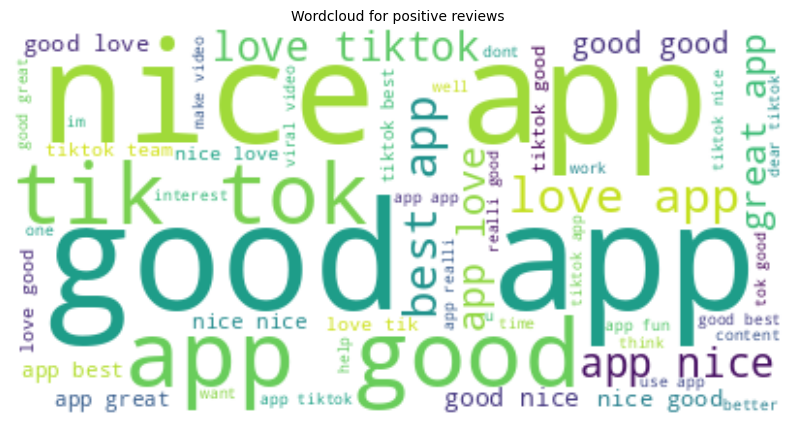

In [60]:
# Wordcloud for negative, positive and neutral words
positive =' '.join([i for i in df['content'][df['Positive'] > df["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=50).generate(positive)
plt.figure( figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Wordcloud for positive reviews", fontsize=10)
plt.axis("off")
plt.show()

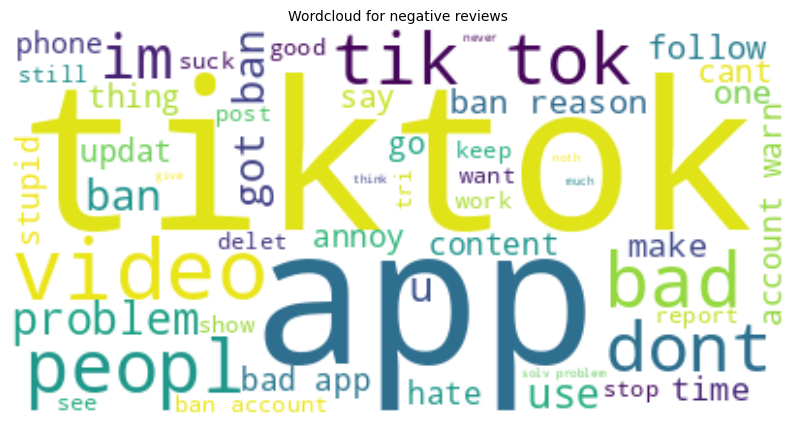

In [61]:
negative =' '.join([i for i in df['content'][df['Negative'] > df["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=50).generate(negative)
plt.figure( figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Wordcloud for negative reviews", fontsize=10)
plt.axis("off")
plt.show()

In [53]:
# sum up all the Positive, Negative, and Neutral reviews 
# and then execute an If and Elif conditional block to determine the overall sentiment score of the entire dataset

pos_sum = sum(df["Positive"])
print("Positive ", pos_sum)
neg_sum = sum(df["Negative"])
print("Negative ", neg_sum)
neu_sum = sum(df["Neutral"])
print("Neutral ", neu_sum)
label = {"Positive":199770.626 ,"Negative":17446.561,"Neutral":234567.138}
"""qty = []
qty.append(pos_sum)
qty.append(neg_sum)
qty.append(neu_sum)
qty"""
label


Positive  199770.626
Negative  17446.561
Neutral  234567.138


{'Positive': 199770.626, 'Negative': 17446.561, 'Neutral': 234567.138}

In [52]:
fig = px.pie(df,
             labels=label,
             names= qty,
             title= "Percentage of Negative, Positive, and Neutral Reviews on TikTok",
             )
fig.show()